<a href="https://colab.research.google.com/github/LukaKKS/KKS_Project/blob/main/2022/COVID%20With%20Jeju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kei

!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
# 지역검색건수 데이터 불러오기
# df = pd.read_csv('20220614104948_지역별 검색건수 추이_final.csv', encoding='cp949')
df2 = pd.read_csv('20220615043524_지역별 검색건수 추이.csv', encoding='cp949')

FileNotFoundError: ignored

In [ ]:
## 전체 검색건수##
## 전체 검색건수##
df

In [ ]:
data_search = df[df['카테고리'] == '전체']
data_search

In [ ]:
data_search_ratio = (data_search['검색건수'] - data_search['전년도 검색건수']) / data_search['전년도 검색건수']*100
data_search['증감률'] = data_search_ratio
data_search

In [ ]:
data_search['증감률 순위'] = data_search['증감률'].rank(method="dense", ascending=False).apply(lambda rank: int(rank))
data_search

In [ ]:
#####  자연관광지 ########
df

In [ ]:
data_nature = df[df['카테고리'] == '자연관광']
data_nature

total_research = df[df['카테고리'] == '전체']
total_2021 = total_research['검색건수'].to_list()
total_2020 = total_research['전년도 검색건수'].to_list()



In [ ]:
data_nature['2021년 총검색건수'] = total_2021
data_nature['2020년 총검색건수'] = total_2020

data_nature

In [ ]:
nature_ratio_2020 = (data_nature['전년도 검색건수'] / data_nature['2020년 총검색건수']) * 100
nature_ratio_2021 = (data_nature['검색건수'] / data_nature['2021년 총검색건수'])* 100

data_nature_final = data_nature.copy()

In [ ]:
data_nature_final['2020년 자연관광지 구성비(단위: %)'] = nature_ratio_2020
data_nature_final['2021년 자연관광지 구성비(단위: %)'] = nature_ratio_2021
data_nature_final

In [ ]:
data_nature_final = data_nature_final.loc[:,['기준년월','2020년 자연관광지 구성비(단위: %)','2021년 자연관광지 구성비(단위: %)']]
data_nature_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

nature_2020_list = data_nature_final['2020년 자연관광지 구성비(단위: %)'].to_list()
nature_2020_list

nature_2021_list = data_nature_final['2021년 자연관광지 구성비(단위: %)'].to_list()
nature_2021_list

nature_minus = [x-y for x,y in zip(nature_2021_list, nature_2020_list)]
nature_minus = pd.DataFrame(nature_minus)
nature_minus_final = nature_minus.round(3)
nature_minus_final


In [ ]:
#kei

import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

# 한글 폰트
font_name = fm.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', size=10).get_name()
plt.rc('font', family = font_name)

ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])

# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_nature_final['기준년월'], data_nature_final[['2020년 자연관광지 구성비(단위: %)', '2021년 자연관광지 구성비(단위: %)']], label='2020년')
plt.plot(data_nature_final['기준년월'], data_nature_final['2020년 자연관광지 구성비(단위: %)'], label='2020년 자연관광지 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_nature_final['기준년월'], data_nature_final['2021년 자연관광지 구성비(단위: %)'], label='2021년 자연관광지 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

# plt.ylim([3,15])
plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

In [ ]:
######## 역사 관광지 ###############


##네비게이션_역사 관광지##

In [ ]:
df #원본데이터 확인하기

In [ ]:
data_history = df[df['카테고리'] == '역사관광']
data_history   # 카테고리가 역사관광인 항목만 추출

In [ ]:
data_history['2021년 총검색건수'] = total_2021
data_history['2020년 총검색건수'] = total_2020

data_history



In [ ]:
data_history_2020 = (data_history['전년도 검색건수'] / data_history['2020년 총검색건수']) * 100
data_history_2021 = (data_history['검색건수'] / data_history['2021년 총검색건수'])* 100

data_history_final = data_history.copy()
data_history_final

In [ ]:
data_history_final['2020년 역사관광지 구성비(단위: %)'] = data_history_2020
data_history_final['2021년 역사관광지 구성비(단위: %)'] = data_history_2021
data_history_final

In [ ]:
data_history_final = data_history_final.loc[:,['기준년월','2020년 역사관광지 구성비(단위: %)','2021년 역사관광지 구성비(단위: %)']]
data_history_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

history_2020_list = data_history_final['2020년 역사관광지 구성비(단위: %)'].to_list()
history_2020_list

history_2021_list = data_history_final['2021년 역사관광지 구성비(단위: %)'].to_list()
history_2021_list

history_minus = [x-y for x,y in zip(history_2021_list, history_2020_list)]
history_minus = pd.DataFrame(history_minus)
history_minus_final = history_minus.round(3)
history_minus_final

In [ ]:
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

# 한글 폰트
font_name = fm.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', size=10).get_name()
plt.rc('font', family = font_name)

ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])
#plt.plot(data_history_final['기준년월'], data_history_final[['2020년 역사관광지 구성비(단위: %)', '2021년 역사관광지 구성비(단위: %)']])

plt.plot(data_history_final['기준년월'], data_history_final['2020년 역사관광지 구성비(단위: %)'], label='2020년 역사관광지 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_history_final['기준년월'], data_history_final['2021년 역사관광지 구성비(단위: %)'], label='2021년 역사관광지 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)


##네이게이션_숙박##

In [ ]:
df

In [ ]:
data_sleep = df[df['카테고리'] == '숙박']
data_sleep

In [ ]:
data_sleep['2021년 총검색건수'] = total_2021
data_sleep['2020년 총검색건수'] = total_2020

data_sleep


In [ ]:
data_sleep_2020 = (data_sleep['전년도 검색건수'] / data_sleep['2020년 총검색건수']) * 100
data_sleep_2021 = (data_sleep['검색건수'] / data_sleep['2021년 총검색건수'])* 100

data_sleep_final = data_sleep.copy()
data_sleep_final

In [ ]:
data_sleep_final['2020년 숙박 구성비(단위: %)'] = data_sleep_2020
data_sleep_final['2021년 숙박 구성비(단위: %)'] = data_sleep_2021
data_sleep_final

In [ ]:
data_sleep_final = data_sleep_final.loc[:,['기준년월','2020년 숙박 구성비(단위: %)','2021년 숙박 구성비(단위: %)']]
data_sleep_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

sleep_2020_list = data_sleep_final['2020년 숙박 구성비(단위: %)'].to_list()
sleep_2020_list

sleep_2021_list = data_sleep_final['2021년 숙박 구성비(단위: %)'].to_list()
sleep_2021_list

sleep_minus = [x-y for x,y in zip(sleep_2021_list, sleep_2020_list)]
sleep_minus = pd.DataFrame(sleep_minus)
sleep_minus_final = sleep_minus.round(3)
sleep_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_sleep_final['기준년월'], data_sleep_final[['2020년 숙박 구성비(단위: %)', '2021년 숙박 구성비(단위: %)']])
plt.plot(data_sleep_final['기준년월'], data_sleep_final['2020년 숙박 구성비(단위: %)'], label='2020년 숙박 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_sleep_final['기준년월'], data_sleep_final['2021년 숙박 구성비(단위: %)'], label='2021년 숙박 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

##네이게이션_음식##

In [ ]:
df

In [ ]:
data_food = df[df['카테고리'] == '음식']
data_food

In [ ]:
data_food['2021년 총검색건수'] = total_2021
data_food['2020년 총검색건수'] = total_2020


data_food



In [ ]:
data_food_2020 = (data_food['전년도 검색건수'] / data_food['2020년 총검색건수']) * 100
data_food_2021 = (data_food['검색건수'] / data_food['2021년 총검색건수'])* 100

data_food_final = data_food.copy()
data_food_final

In [ ]:
data_food_final['2020년 음식 구성비(단위: %)'] = data_food_2020
data_food_final['2021년 음식 구성비(단위: %)'] = data_food_2021
data_food_final

In [ ]:
data_food_final = data_food_final.loc[:,['기준년월','2020년 음식 구성비(단위: %)','2021년 음식 구성비(단위: %)']]
data_food_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

food_2020_list = data_food_final['2020년 음식 구성비(단위: %)'].to_list()
food_2020_list

food_2021_list = data_food_final['2021년 음식 구성비(단위: %)'].to_list()
food_2021_list

food_minus = [x-y for x,y in zip(food_2021_list, food_2020_list)]
food_minus = pd.DataFrame(food_minus)
food_minus_final = food_minus.round(3)
food_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_food_final['기준년월'], data_food_final[['2020년 음식 구성비(단위: %)', '2021년 음식 구성비(단위: %)']])
plt.plot(data_food_final['기준년월'], data_food_final['2020년 음식 구성비(단위: %)'], label='2020년 음식 구성비(단위: %))', marker='o', color='black', ls=':')
plt.plot(data_food_final['기준년월'], data_food_final['2021년 음식 구성비(단위: %)'], label='2021년 음식 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

##레포츠(레저스포츠)##

In [ ]:
df

In [ ]:
data_lezer = df[df['카테고리'] == '레저스포츠']
data_lezer

In [ ]:
data_lezer['2021년 총검색건수'] = total_2021
data_lezer['2020년 총검색건수'] = total_2020


data_lezer



In [ ]:
data_lezer_2020 = (data_lezer['전년도 검색건수'] / data_lezer['2020년 총검색건수']) * 100
data_lezer_2021 = (data_lezer['검색건수'] / data_lezer['2021년 총검색건수'])* 100

data_lezer_final = data_lezer.copy()
data_lezer_final

In [ ]:
data_lezer_final['2020년 레저스포츠 구성비(단위: %)'] = data_lezer_2020
data_lezer_final['2021년 레저스포츠 구성비(단위: %)'] = data_lezer_2021
data_lezer_final

In [ ]:
data_lezer_final = data_lezer_final.loc[:,['기준년월','2020년 레저스포츠 구성비(단위: %)','2021년 레저스포츠 구성비(단위: %)']]
data_lezer_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

lezer_2020_list = data_lezer_final['2020년 레저스포츠 구성비(단위: %)'].to_list()
lezer_2020_list

lezer_2021_list = data_lezer_final['2021년 레저스포츠 구성비(단위: %)'].to_list()
lezer_2021_list

lezer_minus = [x-y for x,y in zip(lezer_2021_list, lezer_2020_list)]
lezer_minus = pd.DataFrame(lezer_minus)
lezer_minus_final = lezer_minus.round(3)
lezer_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_lezer_final['기준년월'], data_lezer_final[['2020년 레저스포츠 구성비(단위: %)', '2021년 레저스포츠 구성비(단위: %)']])
plt.plot(data_lezer_final['기준년월'], data_lezer_final['2020년 레저스포츠 구성비(단위: %)'], label='2020년 레저스포츠 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_lezer_final['기준년월'], data_lezer_final['2021년 레저스포츠 구성비(단위: %)'], label='2021년 레저스포츠 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

##네비게이션_쇼핑##

In [ ]:
df

In [ ]:
data_shopping = df[df['카테고리'] == '쇼핑']
data_shopping

In [ ]:
data_shopping['2021년 총검색건수'] = total_2021
data_shopping['2020년 총검색건수'] = total_2020


data_shopping



In [ ]:
data_shopping_2020 = (data_shopping['전년도 검색건수'] / data_shopping['2020년 총검색건수']) * 100
data_shopping_2021 = (data_shopping['검색건수'] / data_shopping['2021년 총검색건수'])* 100

data_shopping_final = data_shopping.copy()
data_shopping_final

In [ ]:
data_shopping_final['2020년 쇼핑 구성비(단위: %)'] = data_shopping_2020
data_shopping_final['2021년 쇼핑 구성비(단위: %)'] = data_shopping_2021
data_shopping_final

In [ ]:
data_shopping_final = data_shopping_final.loc[:,['기준년월','2020년 쇼핑 구성비(단위: %)','2021년 쇼핑 구성비(단위: %)']]
data_shopping_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

shopping_2020_list = data_shopping_final['2020년 쇼핑 구성비(단위: %)'].to_list()
shopping_2020_list

shopping_2021_list = data_shopping_final['2021년 쇼핑 구성비(단위: %)'].to_list()
shopping_2021_list

shopping_minus = [x-y for x,y in zip(shopping_2021_list, shopping_2020_list)]
shopping_minus = pd.DataFrame(shopping_minus)
shopping_minus_final = shopping_minus.round(3)
shopping_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_shopping_final['기준년월'], data_shopping_final[['2020년 쇼핑 구성비(단위: %)', '2021년 쇼핑 구성비(단위: %)']])
plt.plot(data_shopping_final['기준년월'], data_shopping_final['2020년 쇼핑 구성비(단위: %)'], label='2020년 쇼핑 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_shopping_final['기준년월'], data_shopping_final['2021년 쇼핑 구성비(단위: %)'], label='2021년 쇼핑 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

##네이게이션_기타관광##

In [ ]:
### 기타관광 ######

df

In [ ]:
data_etc = df[df['카테고리'] == '기타관광']
data_etc

In [ ]:
data_etc['2021년 총검색건수'] = total_2021
data_etc['2020년 총검색건수'] = total_2020


data_etc



In [ ]:
data_etc_2020 = (data_etc['전년도 검색건수'] / data_etc['2020년 총검색건수']) * 100
data_etc_2021 = (data_etc['검색건수'] / data_etc['2021년 총검색건수'])* 100

data_etc_final = data_etc.copy()
data_etc_final

In [ ]:
data_etc_final['2020년 기타관광 구성비(단위: %)'] = data_etc_2020
data_etc_final['2021년 기타관광 구성비(단위: %)'] = data_etc_2021
data_etc_final

In [ ]:
data_etc_final = data_etc_final.loc[:,['기준년월','2020년 기타관광 구성비(단위: %)','2021년 기타관광 구성비(단위: %)']]
data_etc_final

In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

etc_2020_list = data_etc_final['2020년 기타관광 구성비(단위: %)'].to_list()
etc_2020_list

etc_2021_list = data_etc_final['2021년 기타관광 구성비(단위: %)'].to_list()
etc_2021_list

etc_minus = [x-y for x,y in zip(etc_2021_list, etc_2020_list)]
etc_minus = pd.DataFrame(etc_minus)
etc_minus_final = etc_minus.round(3)
etc_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_etc_final['기준년월'], data_etc_final[['2020년 기타관광 구성비(단위: %)', '2021년 기타관광 구성비(단위: %)']])
plt.plot(data_etc_final['기준년월'], data_etc_final['2020년 기타관광 구성비(단위: %)'], label='2020년 기타관광 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_etc_final['기준년월'], data_etc_final['2021년 기타관광 구성비(단위: %)'], label='2021년 기타관광 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

##네이게이션_체험관광##

In [ ]:
data_experience = df[df['카테고리'] == '체험관광']
data_experience

In [ ]:
data_experience['2021년 총검색건수'] = total_2021
data_experience['2020년 총검색건수'] = total_2020


data_experience



In [ ]:
data_experience_2020 = (data_experience['전년도 검색건수'] / data_experience['2020년 총검색건수']) * 100
data_experience_2021 = (data_experience['검색건수'] / data_experience['2021년 총검색건수'])* 100

data_experience_final = data_experience.copy()
data_experience_final

In [ ]:
data_experience_final['2020년 체험관광 구성비(단위: %)'] = data_experience_2020
data_experience_final['2021년 체험관광 구성비(단위: %)'] = data_experience_2021
data_experience_final


In [ ]:
data_experience_final = data_experience_final.loc[:,['기준년월','2020년 체험관광 구성비(단위: %)','2021년 체험관광 구성비(단위: %)']]
data_experience_final


In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

experience_2020_list = data_experience_final['2020년 체험관광 구성비(단위: %)'].to_list()
experience_2020_list

experience_2021_list = data_experience_final['2021년 체험관광 구성비(단위: %)'].to_list()
experience_2021_list

experience_minus = [x-y for x,y in zip(experience_2021_list, experience_2020_list)]
experience_minus = pd.DataFrame(experience_minus)
experience_minus_final = experience_minus.round(3)
experience_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_experience_final['기준년월'], data_experience_final[['2020년 체험관광 구성비(단위: %)', '2021년 체험관광 구성비(단위: %)']])
plt.plot(data_experience_final['기준년월'], data_experience_final['2020년 체험관광 구성비(단위: %)'], label='2020년 체험관광 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_experience_final['기준년월'], data_experience_final['2021년 체험관광 구성비(단위: %)'], label='2021년 체험관광 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

##네비게이션_문화관광##

In [ ]:
data_culture = df[df['카테고리'] == '문화관광']
data_culture

In [ ]:
data_culture['2021년 총검색건수'] = total_2021
data_culture['2020년 총검색건수'] = total_2020


data_culture



In [ ]:
data_culture_2020 = (data_culture['전년도 검색건수'] / data_culture['2020년 총검색건수']) * 100
data_culture_2021 = (data_culture['검색건수'] / data_culture['2021년 총검색건수'])* 100

data_culture_final = data_culture.copy()
data_culture_final


In [ ]:
data_culture_final['2020년 문화관광 구성비(단위: %)'] = data_culture_2020
data_culture_final['2021년 문화관광 구성비(단위: %)'] = data_culture_2021
data_culture_final


In [ ]:
data_culture_final = data_culture_final.loc[:,['기준년월','2020년 문화관광 구성비(단위: %)','2021년 문화관광 구성비(단위: %)']]
data_culture_final



In [ ]:
## 내비게이션 검색건수 여행행태 변수별 구성비 집계 를위해

culture_2020_list = data_culture_final['2020년 문화관광 구성비(단위: %)'].to_list()
culture_2020_list

culture_2021_list = data_culture_final['2021년 문화관광 구성비(단위: %)'].to_list()
culture_2021_list

culture_minus = [x-y for x,y in zip(culture_2021_list, culture_2020_list)]
culture_minus = pd.DataFrame(culture_minus)
culture_minus_final = culture_minus.round(3)
culture_minus_final

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()


ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(data_travel_final[['기준년월']],data_travel_final[['2020년 숙박업구성비','2021년 숙박업구성비']])


# plt.plot(data_cash['기준년월'],data_cash[['지출액','전년도 지출액']])

#plt.plot(data_culture_final['기준년월'], data_culture_final[['2020년 문화관광 구성비(단위: %)', '2021년 문화관광 구성비(단위: %)']])
plt.plot(data_culture_final['기준년월'], data_culture_final['2020년 문화관광 구성비(단위: %)'], label='2020년 문화관광 구성비(단위: %)', marker='o', color='black', ls=':')
plt.plot(data_culture_final['기준년월'], data_culture_final['2021년 문화관광 구성비(단위: %)'], label='2021년 문화관광 구성비(단위: %)', marker='o', color='red', ls=':')
plt.legend(loc = 'upper left') #label 위치 설정

plt.xlabel('month',fontsize=14)
plt.ylabel('ratio(%)',fontsize=14)

plt.show()

In [ ]:
nature = nature_minus_final

# ps1 = pd.Series(nature)
# ps1
nature
history = history_minus_final
sleep = sleep_minus_final
day = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
day = pd.DataFrame(day)
Bind = pd.concat([day,nature,history,sleep], axis =1 )
Bind

In [ ]:
Bind.columns =['기준년월','자연','역사','숙박']

In [ ]:
Bind.set_index('기준년월')

In [ ]:
#kei

!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
df2 = pd.read_csv('2021_지역별검색건수_통합본.csv')

UnicodeDecodeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_nature = df2[df2['티맵카테고리중분류명'] =='자연관광']
df_nature = df_nature.loc[:,['기준년월','광역지자체 검색건수']]
df_nature_list = df_nature['광역지자체 검색건수'].to_list()
df_nature_list = pd.DataFrame(df_nature_list)
df_nature_list

df_nature_list2 = df_nature['기준년월'].to_list()
df_nature_list2 = pd.DataFrame(df_nature_list2)
df_nature_list2

In [ ]:
# df_history = df2[df2['티맵카테고리중분류명'] == '역사관광']
# df_history = df_history.loc[:,['기준년월','광역지자체 검색건수']]
# df_history = pd.DataFrame(df_history)


df_history_list = df_history['광역지자체 검색건수'].to_list()
df_history_list = pd.DataFrame(df_history_list)
df_history_list

Month = df_history['기준년월'].to_list()
Month = pd.DataFrame(Month)
Month

In [ ]:
total_sum = pd.concat([Month,df_nature_list, df_history_list], axis = 1)
total_sum

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('2021_지역별검색건수_통합본.csv', encoding='cp949')
df

,기준년월,광역지자체,카테고리,2021검색건수,2020년검색건수
0,20210101,제주특별자치도,전체,30743,0
1,20210101,제주특별자치도,자연관광,4653,0
2,20210101,제주특별자치도,역사관광,273,0
3,20210101,제주특별자치도,체험관광,293,0
4,20210101,제주특별자치도,문화관광,2279,0
...,...,...,...,...,...
3645,20211231,제주특별자치도,레저스포츠,2070,1574
3646,20211231,제주특별자치도,쇼핑,3234,2108
3647,20211231,제주특별자치도,음식,21782,13925
3648,20211231,제주특별자치도,숙박,11708,7006


In [ ]:
df_nature = df[df['카테고리'] == '자연관광']
df_nature


Month = df_nature['기준년월'].to_list()
Month = pd.DataFrame(Month)
Month
df_nature_list = df_nature['2021검색건수'].to_list()
df_nature_list_df = pd.DataFrame(df_nature_list)
df_nature_list_df





,0
0,4653
1,4535
2,3502
3,2824
4,2246
...,...
360,4598
361,5674
362,5589
363,5793


In [ ]:
##역사관광
df_history = df[df['카테고리'] == '역사관광']
df_history

df_history_list = df_history['2021검색건수'].to_list()
df_history_list_df = pd.DataFrame(df_history_list)
df_history_list_df

,0
0,273
1,317
2,220
3,179
4,141
...,...
360,246
361,305
362,341
363,391


In [ ]:
##체험관광
df_experience = df[df['카테고리'] == '체험관광']
df_experience

df_experience_list = df_experience['2021검색건수'].to_list()
df_experience_list_df = pd.DataFrame(df_experience_list)
df_experience_list_df

,0
0,293
1,304
2,165
3,128
4,95
...,...
360,626
361,738
362,709
363,754


In [ ]:
##문화관광
df_culture = df[df['카테고리'] == '문화관광']
df_culture

df_culture_list = df_culture['2021검색건수'].to_list()
df_culture_list_df = pd.DataFrame(df_culture_list)
df_culture_list_df

,0
0,2279
1,2429
2,1762
3,1157
4,1300
...,...
360,4762
361,4911
362,4977
363,5402


In [ ]:
##레저스포츠
df_lezer = df[df['카테고리'] == '레저스포츠']
df_lezer

df_lezer_list = df_lezer['2021검색건수'].to_list()
df_lezer_list_df = pd.DataFrame(df_lezer_list)
df_lezer_list_df

,0
0,1053
1,1253
2,1028
3,846
4,747
...,...
360,1337
361,1895
362,1923
363,2051


In [ ]:
##쇼핑
df_shop = df[df['카테고리'] == '쇼핑']
df_shop

df_shop_list = df_shop['2021검색건수'].to_list()
df_shop_list_df = pd.DataFrame(df_shop_list)
df_shop_list_df

,0
0,1728
1,2056
2,1390
3,1269
4,1175
...,...
360,2752
361,2608
362,2826
363,3045


In [ ]:
##음식
df_food = df[df['카테고리'] == '음식']
df_food

df_food_list = df_food['2021검색건수'].to_list()
df_food_list_df = pd.DataFrame(df_food_list)
df_food_list_df


,0
0,11129
1,11182
2,8225
3,5613
4,5186
...,...
360,16863
361,17801
362,18404
363,20399


In [ ]:
df[df['카테고리'] == '숙박']

,기준년월,광역지자체,카테고리,2021검색건수,2020년검색건수
8,20210101,제주특별자치도,숙박,5877,0
18,20210102,제주특별자치도,숙박,4683,0
28,20210103,제주특별자치도,숙박,3249,0
38,20210104,제주특별자치도,숙박,3074,9819
48,20210105,제주특별자치도,숙박,2865,10032
...,...,...,...,...,...
3608,20211227,제주특별자치도,숙박,9387,5007
3618,20211228,제주특별자치도,숙박,9511,4751
3628,20211229,제주특별자치도,숙박,9772,4864
3638,20211230,제주특별자치도,숙박,10619,6154


In [ ]:
##숙박
df_sleep = df[df['카테고리'] == '숙박']
df_sleep

df_sleep_list = df_sleep['2021검색건수'].to_list()
df_sleep_list_df = pd.DataFrame(df_sleep_list)
df_sleep_list_df


,0
0,5877
1,4683
2,3249
3,3074
4,2865
...,...
360,9387
361,9511
362,9772
363,10619


In [ ]:
##기타관광
df_etc = df[df['카테고리'] == '기타관광']
df_etc

df_etc_list = df_etc['2021검색건수'].to_list()
df_etc_list_df = pd.DataFrame(df_etc_list)
df_etc_list_df


,0
0,3458
1,3668
2,3387
3,2556
4,2178
...,...
360,4797
361,5503
362,5892
363,5943


In [ ]:
Nature_total = df_nature_list_df
History_total = df_history_list_df
Experience_total = df_experience_list_df
Culture_total = df_culture_list_df
Lezer_total = df_lezer_list_df
Shop_total = df_shop_list_df
Food_total = df_food_list_df
Sleep_total = df_sleep_list_df
Etc_total = df_etc_list_df

total_navi = pd.concat([Month,Nature_total,History_total,Experience_total,Culture_total,
                        Lezer_total,Shop_total,Food_total,Sleep_total,Etc_total],axis =1)

total_navi.columns =['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠(네비)','쇼핑(네비)','음식',
                     '숙박','기타관광']
total_navi.set_index('기준년월')
total_navi

,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠(네비),쇼핑(네비),음식,숙박,기타관광
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178
...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943


In [ ]:
#################### 신용카드 ################

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('2021_신용카드지출_통합본.csv', encoding='cp949')
df

,기준년월,광역지자체,중분류,2021지출액,2020지출액
0,20210101,제주특별자치도,총소비,1335714,0
1,20210101,제주특별자치도,호텔,74358,0
2,20210101,제주특별자치도,콘도,52474,0
3,20210101,제주특별자치도,캠핑장/펜션,229,0
4,20210101,제주특별자치도,기타숙박,60421,0
...,...,...,...,...,...
6879,20211231,제주특별자치도,관광유원시설,28748,11536
6880,20211231,제주특별자치도,골프장,146599,136385
6881,20211231,제주특별자치도,기타레저,8805,6440
6882,20211231,제주특별자치도,문화서비스,37655,14010


In [ ]:
##여행업
df_travel = df[df['중분류'] == '여행업']
df_travel
df_travel_list = df_travel['2021지출액'].to_list()
df_travel_list_df = pd.DataFrame(df_travel_list)
df_travel_list_df


,0
0,929
1,951
2,1288
3,559
4,1225
...,...
360,8215
361,8365
362,9679
363,10704


In [ ]:
##렌터카
df_rent = df[df['중분류'] == '렌터카']
df_rent
df_rent_list = df_rent['2021지출액'].to_list()
df_rent_list_df = pd.DataFrame(df_rent_list)
df_rent_list_df


,0
0,30284
1,22891
2,23336
3,24588
4,23466
...,...
360,86712
361,80357
362,83503
363,82947


In [ ]:
##항공운송
df_airplane = df[df['중분류'] == '항공운송']
df_airplane
df_airplane_list = df_airplane['2021지출액'].to_list()
df_airplane_list_df = pd.DataFrame(df_airplane_list)
df_airplane_list_df


,0
0,13254
1,10700
2,12910
3,12452
4,15684
...,...
360,74010
361,65535
362,68990
363,68801


In [ ]:
##면세점
df_tax = df[df['중분류'] == '면세점']
df_tax
df_tax_list = df_tax['2021지출액'].to_list()
df_tax_list_df = pd.DataFrame(df_tax_list)
df_tax_list_df


,0
0,228129
1,305124
2,407852
3,208826
4,172061
...,...
360,532653
361,502802
362,548017
363,601774


In [ ]:
 ##문화서비스
df_cultureService = df[df['중분류'] == '문화서비스']
df_cultureService
df_cultureService_list = df_cultureService['2021지출액'].to_list()
df_cultureService_list_df = pd.DataFrame(df_cultureService_list)
df_cultureService_list_df


,0
0,12846
1,13526
2,10185
3,7614
4,7029
...,...
360,31089
361,32824
362,31884
363,38380


In [ ]:
 ##식음료
df_drink = df[df['중분류'] == '식음료']
df_drink
df_drink_list = df_drink['2021지출액'].to_list()
df_drink_list_df = pd.DataFrame(df_drink_list)
df_drink_list_df


,0
0,595188
1,612857
2,474648
3,377751
4,386979
...,...
360,1153732
361,1224480
362,1288538
363,1351617


In [ ]:
 ##숙박업(콘도+호텔)
df_condo = df[df['중분류'] == '콘도']
df_hotel = df[df['중분류'] == '호텔']

df_condo_list = df_condo['2021지출액'].to_list()
df_hotel_list = df_hotel['2021지출액'].to_list()

con_hotel_list = [x+y for x,y in zip(df_condo_list, df_hotel_list)]
con_hotel_list_df = pd.DataFrame(con_hotel_list)
con_hotel_list_df




,0
0,126832
1,113452
2,138937
3,52310
4,61606
...,...
360,337049
361,284191
362,341675
363,445283


In [ ]:
 ##대중교통(육상운송+수상운송)   ---------->육상운송과 수상운송은 날짜에 아예 없는날이 있음
df_land = df[df['중분류'] == '육상운송']
df_sea = df[df['중분류'] == '수상운송']

df_land_list = df_land['2021지출액'].to_list()
df_sea_list = df_sea['2021지출액'].to_list()

land_sea_list = [x+y for x,y in zip(df_land_list, df_sea_list)]
land_sea_list_df = pd.DataFrame(land_sea_list)
land_sea_list_df




,0
0,2857
1,3996
2,2108
3,2182
4,1626
...,...
319,10653
320,11562
321,12082
322,8492


In [ ]:
 ##쇼핑(면세점제외)->관광기념품 + 레저용품쇼핑 + 대형쇼핑몰
df_guide = df[df['중분류'] == '관광기념품']
df_lezer = df[df['중분류'] == '레저용품쇼핑']
df_market = df[df['중분류'] == '대형쇼핑몰']

df_guide_list = df_guide['2021지출액'].to_list()
df_lezer_list = df_lezer['2021지출액'].to_list()
df_market_list = df_market['2021지출액'].to_list()

guide_lezer_list = [x+y for x,y in zip(df_guide_list, df_lezer_list)]
guide_lezer_market_list = [x+y for x,y in zip(guide_lezer_list, df_market_list)]


guide_lezer_market_list_df = pd.DataFrame(guide_lezer_market_list)
guide_lezer_market_list_df




,0
0,203125
1,248151
2,195077
3,171722
4,150200
...,...
360,261650
361,275758
362,290685
363,315409


In [ ]:
 ##레저스포츠->관광유원시설 + 골프장 + 기타레저
df_facilities = df[df['중분류'] == '관광유원시설']
df_golf = df[df['중분류'] == '골프장']
df_etc_lezer = df[df['중분류'] == '기타레저']

df_facilities_list = df_facilities['2021지출액'].to_list()
df_golf_list = df_golf['2021지출액'].to_list()
df_etc_lezer_list = df_etc_lezer['2021지출액'].to_list()

facilities_golf_list = [x+y for x,y in zip(df_facilities_list, df_golf_list)]
facilities_golf_lezer_list = [x+y for x,y in zip(facilities_golf_list, df_etc_lezer_list)]


facilities_golf_lezer_list_df = pd.DataFrame(facilities_golf_lezer_list)
facilities_golf_lezer_list_df




,0
0,61620
1,94853
2,113527
3,97997
4,104184
...,...
360,78136
361,134567
362,155112
363,210253


In [ ]:
Travel_total = df_travel_list_df   #여행업
Rent_total = df_rent_list_df   #렌터카
Airplane_total = df_airplane_list_df #항공운송
Tax_total = df_tax_list_df  # 면세점
CultureService = df_cultureService_list_df  #문화서비스
drink_total = df_drink_list_df  #식음료
Con_hotel_total = con_hotel_list_df   #숙박업(콘도+ 호텔)
Land_sea_total = land_sea_list_df   # 대중교통(육상운동 + 수상운송)
Guide_lezer_market_total = guide_lezer_market_list_df    #쇼핑(면세점제외) -> 관광기념품 + 레저용품쇼핑 + 대형쇼핑몰
Facilties_golf_total       = facilities_golf_lezer_list_df  # 레저스포츠(관광유원시설 + 골프장 + 기타레저)

total_daily = pd.concat([total_navi,Travel_total,Rent_total,Airplane_total,Tax_total,
                        CultureService, drink_total,Con_hotel_total,Land_sea_total,Guide_lezer_market_total,Facilties_golf_total],axis=1)

total_daily.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠(네비)','쇼핑(네비)','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑','레저스포츠']

total_daily.set_index('기준년월')
total_daily
# total_navi = pd.concat([Month,Nature_total,History_total,Experience_total,Culture_total,
#                         Lezer_total,Shop_total,Food_total,Sleep_total,Etc_total],axis =1)

# # total_navi.columns =['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠','쇼핑','음식',
# #                      '숙박','기타관광']
# # total_navi.set_index('기준년월')
# # total_navi




,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠(네비),쇼핑(네비),음식,숙박,기타관광,여행업,렌터카,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑,레저스포츠
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458,929,30284,13254,228129,12846,595188,126832,2857.0,203125,61620
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668,951,22891,10700,305124,13526,612857,113452,3996.0,248151,94853
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387,1288,23336,12910,407852,10185,474648,138937,2108.0,195077,113527
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556,559,24588,12452,208826,7614,377751,52310,2182.0,171722,97997
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178,1225,23466,15684,172061,7029,386979,61606,1626.0,150200,104184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797,8215,86712,74010,532653,31089,1153732,337049,NaN,261650,78136
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503,8365,80357,65535,502802,32824,1224480,284191,NaN,275758,134567
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892,9679,83503,68990,548017,31884,1288538,341675,NaN,290685,155112
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943,10704,82947,68801,601774,38380,1351617,445283,NaN,315409,210253


In [ ]:
###### 지역방문자########
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('2021_방문자 수 추이_통합본.csv',encoding='cp949')
df

df_OutPerson =df[df['방문자 구분'] == '외지인방문자(b)']



df_OutPerson_list = df_OutPerson['방문자 수'].to_list()
df_OutPerson_list_df = pd.DataFrame(df_OutPerson_list)
df_OutPerson_list_df
total_region = df_OutPerson_list_df

In [ ]:
total_nofinal = pd.concat([total_daily, total_region],axis=1)

total_nofinal.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑_카드','레저스포츠_카드','방문객수']

total_nofinal.set_index('기준년월')
total_nofinal
# total_navi = pd.concat([Month,Nature_total,History_total,Experience_total,Culture_total,
#                         Lezer_total,Shop_total,Food_total,Sleep_total,Etc_total],axis =1)

# # total_navi.columns =['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠','쇼핑','음식',
# #                      '숙박','기타관광']
# # total_navi.set_index('기준년월')
# # total_navi




,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠_네비,쇼핑_네비,음식,숙박,기타관광,...,렌터카,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑_카드,레저스포츠_카드,방문객수
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458,...,30284,13254,228129,12846,595188,126832,2857.0,203125,61620,85340
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668,...,22891,10700,305124,13526,612857,113452,3996.0,248151,94853,89464
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387,...,23336,12910,407852,10185,474648,138937,2108.0,195077,113527,82579
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556,...,24588,12452,208826,7614,377751,52310,2182.0,171722,97997,76111
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178,...,23466,15684,172061,7029,386979,61606,1626.0,150200,104184,73574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797,...,86712,74010,532653,31089,1153732,337049,NaN,261650,78136,186011
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503,...,80357,65535,502802,32824,1224480,284191,NaN,275758,134567,188002
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892,...,83503,68990,548017,31884,1288538,341675,NaN,290685,155112,201078
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943,...,82947,68801,601774,38380,1351617,445283,NaN,315409,210253,209002


In [ ]:
### 코로나데이터 ####
import pandas as pd
from google.colab import files
uploaded = files.upload()
df_covid = pd.read_excel('2021_코로나데이터.xlsx')  #원본데이터는 역순으로 숫자가 가고있기때문에 정렬을해줘야함
df_covid = df_covid.sort_values(by = '기준일')
df_covid

,게시글번호,기준일,기준시간,확진자 수,사망자 수,등록일시분초,수정일시분초
364,348,2021-01-01,00:00,61753,917,2021-01-01 00:00:00.000,2021-10-07 10:30:51.51
363,349,2021-01-02,00:00,62573,942,2021-01-02 00:00:00.000,2021-10-07 10:30:51.51
362,350,2021-01-03,00:00,63230,962,2021-01-03 00:00:00.000,2021-10-07 10:30:51.51
361,351,2021-01-04,00:00,64250,981,2021-01-04 00:00:00.000,2021-10-07 10:30:51.51
360,352,2021-01-05,00:00,64964,1007,2021-01-05 00:00:00.000,2021-10-07 10:30:51.51
...,...,...,...,...,...,...,...
4,740,2021-12-27,00:00,611650,5300,2021-12-27 08:59:50.623,2022-01-04 09:05:27.24
3,741,2021-12-28,00:00,615514,5346,2021-12-28 09:01:15.646,2022-01-04 09:05:38.235
2,742,2021-12-29,00:00,620921,5382,2021-12-29 08:56:22.982,2022-01-04 09:05:44.529
1,743,2021-12-30,00:00,625955,5455,2021-12-30 09:06:07.06,2022-01-04 09:05:54.411


In [ ]:
df_covid_list = df_covid['확진자 수'].to_list()
df_covid_list_df = pd.DataFrame(df_covid_list)
df_covid_list_df



,0
0,61753
1,62573
2,63230
3,64250
4,64964
...,...
360,611650
361,615514
362,620921
363,625955


In [ ]:
total_final = pd.concat([total_nofinal,df_covid_list_df],axis=1)

total_final.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑_카드','레저스포츠_카드','방문객수','확진자수']

total_final.set_index('기준년월')
total_final

total_final = total_final.fillna(total_final['대중교통'].median()) # 대중교통에만 결측치가 존재하기 때문에 대중교통 의 중앙값으로 결측치 대체
total_final.isna() # 대중교통에 결측이 NAN 41개

total_final

total_final.to_csv('total_data.csv',encoding='cp949')

In [ ]:
total_final.to_csv('total_data.csv',encoding='cp949')

In [ ]:
# ## 상관관계분석

# corr_M = df.corr()
# corr_M

# import numpy as np
# corr_M = df.corr(method ='pearson')
# corr_M
# mask = np.array(corr_M)
# mask[np.tril_indices_from(mask)] =False

# import matplotlib.pyplot as plt
# import seaborn as sns

# # plt.figure(figsize=(15,15))
# # sns.heatmap(data = total.corr(), annot=True,
# # fmt = '.2f', linewidths=.5, cmap='Blues',
# # vmin = -1 , vmax =1)
# #
# sns.heatmap(corr_M,
#             cmap = sns.light_palette("red",as_cmap = True),
#             annot = True,
#             mask = mask)

# plt.show()

In [ ]:
## 상관관계분석
import numpy as np
corr_M = total_final.corr(method ='pearson')
corr_M
mask = np.array(corr_M)
mask[np.tril_indices_from(mask)] =False

NameError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

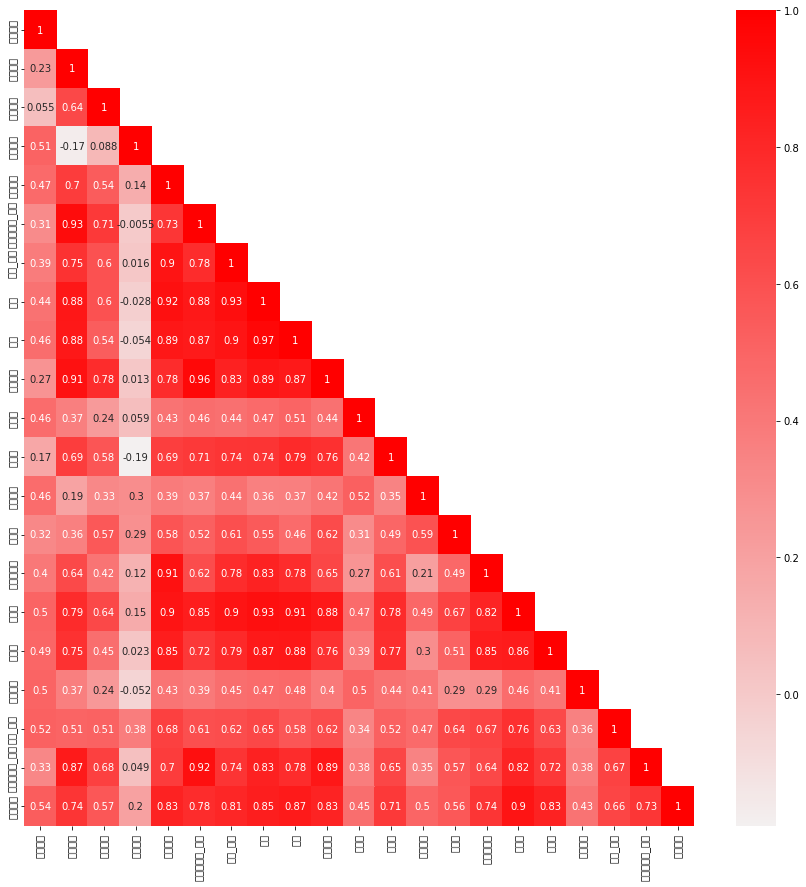

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
# sns.heatmap(data = total.corr(), annot=True,
# fmt = '.2f', linewidths=.5, cmap='Blues',
# vmin = -1 , vmax =1)

sns.heatmap(corr_M,
            cmap = sns.light_palette("red",as_cmap = True),
            annot = True,
            mask = mask)

plt.show()

In [ ]:
total_final
total_data= total_final.drop(['확진자수'], axis = 1)
total_data

,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠_네비,쇼핑_네비,음식,숙박,기타관광,...,렌터카,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑_카드,레저스포츠_카드,방문객수
0,20210101,4653,273,293,2279,1053,1728,11129,5877,3458,...,30284,13254,228129,12846,595188,126832,2857.0,203125,61620,85340
1,20210102,4535,317,304,2429,1253,2056,11182,4683,3668,...,22891,10700,305124,13526,612857,113452,3996.0,248151,94853,89464
2,20210103,3502,220,165,1762,1028,1390,8225,3249,3387,...,23336,12910,407852,10185,474648,138937,2108.0,195077,113527,82579
3,20210104,2824,179,128,1157,846,1269,5613,3074,2556,...,24588,12452,208826,7614,377751,52310,2182.0,171722,97997,76111
4,20210105,2246,141,95,1300,747,1175,5186,2865,2178,...,23466,15684,172061,7029,386979,61606,1626.0,150200,104184,73574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,4598,246,626,4762,1337,2752,16863,9387,4797,...,86712,74010,532653,31089,1153732,337049,9856.0,261650,78136,186011
361,20211228,5674,305,738,4911,1895,2608,17801,9511,5503,...,80357,65535,502802,32824,1224480,284191,9856.0,275758,134567,188002
362,20211229,5589,341,709,4977,1923,2826,18404,9772,5892,...,83503,68990,548017,31884,1288538,341675,9856.0,290685,155112,201078
363,20211230,5793,391,754,5402,2051,3045,20399,10619,5943,...,82947,68801,601774,38380,1351617,445283,9856.0,315409,210253,209002


In [ ]:
target = total_final[['확진자수']]
target

,확진자수
0,61753
1,62573
2,63230
3,64250
4,64964
...,...
360,611650
361,615514
362,620921
363,625955


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv('total_data.csv',encoding = 'cp949')
# df2 = pd.read_csv('20220615043524_지역별 검색건수 추이.csv', encoding='cp949')
df

,Unnamed: 0,기준년월,자연관광,역사관광,체험관광,문화관광,레저스포츠_네비,쇼핑_네비,음식,숙박,...,항공수송,면세점,문화서비스,식음료,숙박업,대중교통,쇼핑_카드,레저스포츠_카드,방문객수,확진자수
0,0,20210101,4653,273,293,2279,1053,1728,11129,5877,...,13254,228129,12846,595188,126832,2857.0,203125,61620,85340,61753
1,1,20210102,4535,317,304,2429,1253,2056,11182,4683,...,10700,305124,13526,612857,113452,3996.0,248151,94853,89464,62573
2,2,20210103,3502,220,165,1762,1028,1390,8225,3249,...,12910,407852,10185,474648,138937,2108.0,195077,113527,82579,63230
3,3,20210104,2824,179,128,1157,846,1269,5613,3074,...,12452,208826,7614,377751,52310,2182.0,171722,97997,76111,64250
4,4,20210105,2246,141,95,1300,747,1175,5186,2865,...,15684,172061,7029,386979,61606,1626.0,150200,104184,73574,64964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,20211227,4598,246,626,4762,1337,2752,16863,9387,...,74010,532653,31089,1153732,337049,9856.0,261650,78136,186011,611650
361,361,20211228,5674,305,738,4911,1895,2608,17801,9511,...,65535,502802,32824,1224480,284191,9856.0,275758,134567,188002,615514
362,362,20211229,5589,341,709,4977,1923,2826,18404,9772,...,68990,548017,31884,1288538,341675,9856.0,290685,155112,201078,620921
363,363,20211230,5793,391,754,5402,2051,3045,20399,10619,...,68801,601774,38380,1351617,445283,9856.0,315409,210253,209002,625955


In [ ]:
from statsmodels.formula.api import ols
# !pip install statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = df.fillna(df['대중교통'].median())

df['Intercept'] =1
dfx = df[['자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
                     '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
                     '대중교통','쇼핑_카드','레저스포츠_카드','방문객수']]
dfy = df['확진자수']
# model = sm.OLS(df['확진자수'], df[['자연관광','역사관광','체험관광','문화관광','레저스포츠_네비' ,'쇼핑_네비','음식','숙박','기타관광',
#                                '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업','대중교통','쇼핑_카드','레저스포츠_카드','방문객수']])
# results = model.fit()
# print(results.summary())
# model3 = ols('확진자수 ~ 자연관광 + 역사관광 + 체험관광 + 문화관광 + 레저스포츠_네비 + 쇼핑_네비 + 기타관광 + 여행업 + 렌터카 + 항공수송 + 면세점 + 문화서비스 + 식음료 + 숙박업 + 대중교통 + 쇼핑_카드 + 레저스포츠_카드 + 방문객수', df)
# res = model3.fit()
# res.summary()

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula('확진자수 ~ 자연관광 + 역사관광 + 체험관광 + 문화관광 + 레저스포츠_네비 + 쇼핑_네비 + scale(음식) + scale(숙박) + scale(기타관광)+ 여행업 + 렌터카 + 항공수송 + 면세점 + 문화서비스 + 식음료 + 숙박업 + 대중교통 + 쇼핑_카드 + 레저스포츠_카드 + 방문객수', data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())



def calc_r2(df_test, result):
    target = df.loc[df_test.index].확진자수
    predict_test = result.predict(df_test)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS


test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    test1.append(calc_r2(df_test, result))

print(test1)

########################################################################################################################################### -----------##############################################

# def get_model2(seed):
#     df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
#     model = sm.OLS.from_formula('확진자수 ~ 자연관광 + 역사관광 + 체험관광 + 문화관광 + 레저스포츠_네비 + 쇼핑_네비 + 기타관광 + 여행업 + 렌터카 + 항공수송 + 면세점 + 문화서비스 + 식음료 + 숙박업 + 대중교통 + 쇼핑_카드 + 레저스포츠_카드 + 방문객수', data=df_train)
#     return df_train, df_test, model.fit()


# df_train, df_test, result1 = get_model2(3)
# print(result1.summary())



# def calc_r3(df_test, result):
#     target = df.loc[df_test.index].확진자수
#     predict_test = result.predict(df_test)
#     RSS = ((predict_test - target)**2).sum()
#     TSS = ((target - target.mean())**2).sum()
#     return 1 - RSS / TSS


# test2 = []
# for i in range(10):
#     df_train, df_test, result = get_model1(i)
#     test2.append(calc_r3(df_test, result))

# print(test2)





# total.columns = ['기준년월', '자연관광','역사관광','체험관광','문화관광','레저스포츠_네비','쇼핑_네비','음식',
#                      '숙박','기타관광', '여행업','렌터카','항공수송','면세점','문화서비스','식음료','숙박업',
#                      '대중교통','쇼핑_카드','레저스포츠_카드','방문객수','확진자수']

                            OLS Regression Results                            
Dep. Variable:                   확진자수   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     46.93
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.11e-56
Time:                        17:58:37   Log-Likelihood:                -2241.3
No. Observations:                 182   AIC:                             4525.
Df Residuals:                     161   BIC:                             4592.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.758e+04   1.62e+05     -0.171      

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif

,VIF Factor,features
0,341.232684,자연관광
1,32.053231,역사관광
2,7.761325,체험관광
3,339.817242,문화관광
4,350.757603,레저스포츠_네비
5,219.343218,쇼핑_네비
6,943.271939,음식
7,799.885846,숙박
8,575.321173,기타관광
9,9.253277,여행업


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# model3.exog_names
# pd.DataFrame({'독립변수명': column, 'VIF': variance_inflation_factor(model3.exog, i)}
#              for i, column in enumerate(model3.exog_names)
#              if column != 'Intercept')

vif = pd.DataFrame()

lst = []

# 독립변수의 갯수 만큼 반복
for i in range(dfx.shape[1]):
    v = variance_inflation_factor(dfx.values, i) # 컬럼을 정수로 지정한다.
    lst.append(v)

vif["VIF Factor"] = lst
vif["features"] = dfx.columns
vif


## 기본적으로 VIF <5 : 안전
## 5< VIF <10 : 주의
##  10< VIF : 위험

## 가장높은 기타관광, 레저스포츠_네비를 지워보자

# new_train = total_final.drop(['레저스포츠_네비','기타관광'],axis = 1)
# new_train



,VIF Factor,features
0,341.232684,자연관광
1,32.053231,역사관광
2,7.761325,체험관광
3,339.817242,문화관광
4,350.757603,레저스포츠_네비
5,219.343218,쇼핑_네비
6,943.271939,음식
7,799.885846,숙박
8,575.321173,기타관광
9,9.253277,여행업


In [ ]:
model3.exog_names

In [ ]:
model4.exog_names

In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)}
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')


## 기본적으로 VIF <5 : 안전
## 5< VIF <10 : 주의
##  10< VIF : 위험



In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model4.exog, i)}
             for i, column in enumerate(model4.exog_names)
             if column != 'Intercept')


## 기본적으로 VIF <5 : 안전
## 5< VIF <10 : 주의
##  10< VIF : 위험

